In [1]:
# Muhammad Ans
# L1F19BSSE0147

# TensorFlow and tf.keras
import tensorflow as tf

import numpy as np
import cv2
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

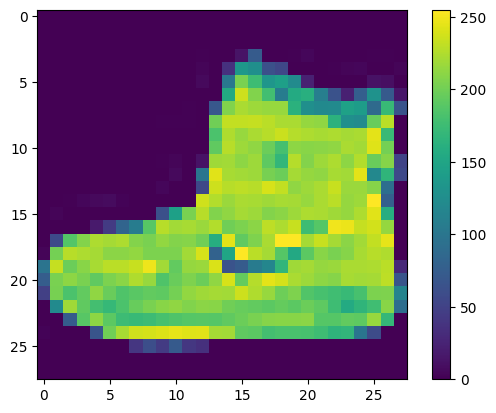

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [6]:
# train_images

In [7]:
def convert_dataset_to_binary(dataset, datalabels, size):
  tr_l=[]
  tr_i = []

  for i in range(0,size):
    # if datalabels[i] == 0:
      if datalabels[i] == 1:
        tr_l.append(1) # 1 for trouser/ bottom
        tr_i.append(dataset[i])
      elif datalabels[i] == 0:
        tr_i.append(dataset[i])
        tr_l.append(0) # 0 means top/shirt

      

  dataset = np.array(tr_i)
  datalabels = np.array(tr_l)

  return dataset, datalabels

In [8]:
train_images, train_labels = convert_dataset_to_binary(train_images, train_labels, 60000)
test_images, test_labels = convert_dataset_to_binary(test_images, test_labels, 10000)

In [9]:
train_images.shape

(12000, 28, 28)

In [10]:
train_labels[133]

1

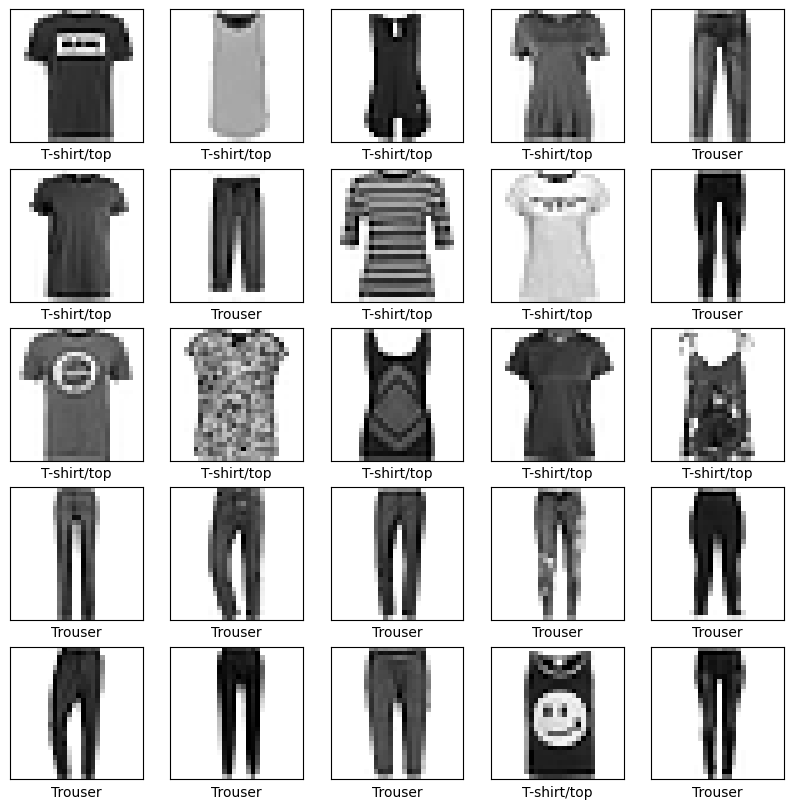

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
def make_model():
  model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(2, activation='softmax')
    ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

  return model

In [13]:
model = make_model()

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
375/375 [==============================] - 14s 4ms/step - loss: 0.0538 - accuracy: 0.9806
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0229 - accuracy: 0.9928
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0164 - accuracy: 0.9949
Epoch 4/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0120 - accuracy: 0.9954
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0088 - accuracy: 0.9962


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

63/63 - 0s - loss: 0.0152 - accuracy: 0.9935 - 326ms/epoch - 5ms/step

Test accuracy: 0.9934999942779541


In [16]:
def predict(model, img):
  img = np.reshape(img, (1, 28, 28))

  predictions = model.predict(img)
  label = np.argmax(predictions[0])

  print(label)

  if label:
    return 'Bottom'

  return "Top"

1/1 [==============================] - 0s 137ms/step
1
Bottom


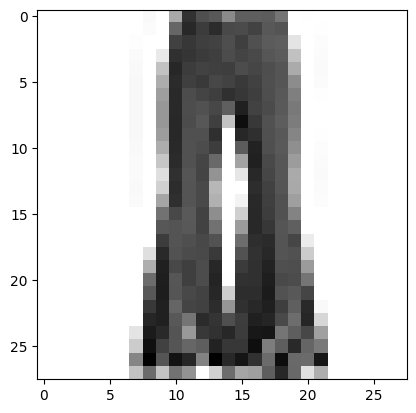

In [17]:
a = 45
print(predict(model, test_images[a]))
plt.imshow(test_images[a], cmap=plt.cm.binary)